# LA Area Strain Curves : CRT-01 

## Testing Cyclicity & Temporal Smoothing of TSFFD

Plotting average area strain from `MT-HiRes/test_cyclicity` directory

## Repeated Img Frames (20 total)

Tracking was performed with the following images ordering:

In [1]:
cat /home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/test_cyclicity/imgTimes.lst

dcm-crop- .nii
0 0
1 5
2 10
3 15
4 20
5 25
6 30
7 35
8 40
9 45
0 50
1 55
2 60
3 65
4 70
5 75
6 80
7 85
8 90
9 95


and config file:

In [2]:
cat /home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/test_cyclicity/Final.cfg

[ input ]
Padding value                      = -1024

[ transformation ]
Transformation model               = FFD
Control point spacing in T         = 10

[ optimization ]
Energy preconditioning             = 0.001
Divide data terms by initial value = No
Interpolation mode                 = Linear
Epsilon                            = -1e-7
Image (dis-)similarity measure     = NMI

[ Level 1 ]
Blurring [mm]                      = 1
Resolution [mm]                    = 2 2 2
Minimum length of steps            = 0.01
Maximum length of steps            = 4
[ Level 2 ]
Blurring [mm]                      = 3
Resolution [mm]                    = 5 5 5
Minimum length of steps            = 0.01
Maximum length of steps            = 4
[ Level 3 ]
Blurring [mm]                      = 6
Resolution [mm]                    = 10 10 10
Minimum length of steps            = 0.01
Maximum length of steps            = 4
[ Level 4 ]
Blurring [mm]                      = 12
Resolution [mm]                    =

## Area Strains wrt manually segmented dcm0 mesh

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
'''
This function drops the column with cell indice from area-strains.csv files
'''

def clean_areastrains_df(df):
    
    df = df.drop(labels='Unnamed: 0', axis=1)
    
    return df

In [5]:
# Array of DataFrames.
# Contains area strain of ALL cells across 20 time phases
# Dim is No time phases, No of cells
ar_df = np.zeros((20, 149195))

In [6]:
# Read in area strains wrt dcm0/Manual mesh for all 20 time phases
for i in range(0, 20):
    
    print(f'i = {i}')
    
    df = pd.read_csv(f'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/test_cyclicity/area-strains-{i}-dcm0.csv')
    df = clean_areastrains_df(df)
    
    ar_df[(i),:] = np.squeeze(df.to_numpy())

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19


In [7]:
df.to_numpy().shape

(149195, 1)

In [8]:
df.to_numpy()[0]

array([-0.13667814])

In [9]:
np.squeeze(df.to_numpy()).shape

(149195,)

In [10]:
np.squeeze(df.to_numpy())[0]

-0.1366781421689245

In [11]:
ar_df[0,0]

0.0809650333626131

In [12]:
# array of mean area change across ALL cells, for every time phase
ar_means = ar_df.mean(axis=1)
ar_means

array([-0.00112662,  0.01292354,  0.03970869,  0.07492763,  0.08799694,
        0.05156633, -0.00564772, -0.04974252, -0.06110459, -0.03815007,
       -0.00375625,  0.016121  ,  0.03885319,  0.07487809,  0.09171309,
        0.05674056, -0.00083795, -0.04296408, -0.05810894, -0.05068588])

### Plotting Mean Area Change of ALL cells

Text(0.5, 1.0, 'CP Spacing in T = 10')

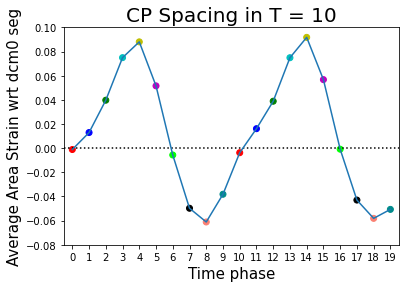

In [13]:
my_colors = ['r', 'b', 'g', 'c', 'y', 'm', 'lime', 'k', 'salmon', 'darkcyan']
my_colors = 2*my_colors

# Plot ave area strains across 2 cycles
plt.plot(ar_means)

# Plot data points
plt.scatter(np.arange(20), ar_means, c=my_colors)

# Plot zero line
plt.hlines(0.0, -0.5, 20.5, linestyles='dotted', color='black')

plt.xlabel('Time phase', fontsize=15)
plt.ylabel('Average Area Strain wrt dcm0 seg', fontsize=15)
plt.xticks(np.arange(20))

plt.xlim(-0.5, 19.5)
plt.ylim(-0.08, 0.1)

plt.title("CP Spacing in T = 10", fontsize=20)

# for n in range(0,10):
#     plt.vlines(n, -0.07, 0.1, linestyles='dotted')
#     plt.vlines(n+10, -0.07, 0.1, linestyles='dotted')
    
# for i in range(0,10):
#     plt.hlines(ar_means[i], -0.5, 20.5, linestyles='dotted')

# plt.vlines(1.0, -0.07, 0.1, linestyles='dotted')
# plt.vlines(11.0, -0.07, 0.1, linestyles='dotted')

# plt.vlines(2.0, -0.07, 0.1, linestyles='dotted')
# plt.vlines(12.0, -0.07, 0.1, linestyles='dotted')

__There is a discrepancy in strains at the repeated imgs__. 
This may be due to:
* Drift effects
* Previous deformations impacting the current deformation
* Temporal Smoothing

__NB:__ Cost fn contribution is not replicated exactly in TSFFD optimisation with repeated imgs.

In [14]:
# Discrepancy in strains of repeated phases 

for i in range(0, 9):
    
    j = i+10

    print(f"Avg area strain of transformed-{str(i)}: \t", ar_means[i])
    print(f"Avg area strain of transformed-{str(j)}: \t", ar_means[j], "\n")

Avg area strain of transformed-0: 	 -0.0011266218752347338
Avg area strain of transformed-10: 	 -0.0037562505455137314 

Avg area strain of transformed-1: 	 0.01292353729394161
Avg area strain of transformed-11: 	 0.016120998448435172 

Avg area strain of transformed-2: 	 0.03970868898433687
Avg area strain of transformed-12: 	 0.038853191265562775 

Avg area strain of transformed-3: 	 0.07492763406024393
Avg area strain of transformed-13: 	 0.07487808697299479 

Avg area strain of transformed-4: 	 0.08799693778552038
Avg area strain of transformed-14: 	 0.09171309168776184 

Avg area strain of transformed-5: 	 0.05156633134093877
Avg area strain of transformed-15: 	 0.05674056431104709 

Avg area strain of transformed-6: 	 -0.005647721262355172
Avg area strain of transformed-16: 	 -0.0008379542983024491 

Avg area strain of transformed-7: 	 -0.049742524655301934
Avg area strain of transformed-17: 	 -0.04296407784084518 

Avg area strain of transformed-8: 	 -0.06110458784967535
Avg are

## Area Strain wrt transformed-0.vtu

Investigation of area strain wrt dcm0/Manual vs transformed-0

In [15]:
# Array of DataFrames for strain wrt transformed-0.vtu
ar_df_0 = np.zeros((20, 149195))

In [16]:
# Read in area strains wrt dcm0/Manual mesh for all 20 time phases
for i in range(0, 20):
    
    print(f'i = {i}')
    
    df = pd.read_csv(f'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/test_cyclicity/area-strains-t10-transformed0-{i}.csv')
    df = clean_areastrains_df(df)
    
    j = i-1
    ar_df_0[(i),:] = np.squeeze(df.to_numpy())

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19


In [17]:
# array of mean area change across ALL cells, for every time phase
ar_means_0 = ar_df_0.mean(axis=1)
ar_means_0

array([ 0.        ,  0.01313196,  0.03930122,  0.07453115,  0.08783755,
        0.05150363, -0.00546529, -0.04893105, -0.05968521, -0.03661205,
       -0.00258929,  0.01660166,  0.03870086,  0.07456234,  0.0914528 ,
        0.05651279, -0.0007714 , -0.04220775, -0.05690326, -0.04984484])

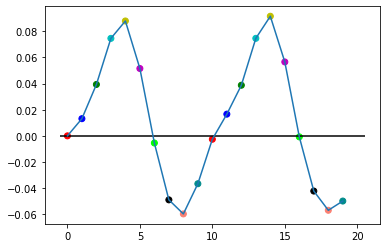

In [18]:
plt.plot(ar_means_0)
plt.scatter(np.arange(20), ar_means_0, c=my_colors)

plt.hlines(0.0, -0.5, 20.5, linestyles='solid', color='black')

In [19]:
ar_means_0[0]

0.0

In [20]:
ar_df_0[0, :]

array([0., 0., 0., ..., 0., 0., 0.])

## Findings

### Problem TB was having?
Did tracking over 20 frames, with 10 frames repeated i.e. 10 frames x 2. Therefore expect to have average area strain close to 0 for dcm0-dcm0 pairing. However TB was seeing 0.05 (5%) average area strain. 

### My Findings
Plotting average area strain wrt dcm0/Manual, I found -0.003 (-0.3%) average area strain for the repeated dcm0 and -0.001 (-0.1%) for first dcm0 (transformed-0.vtu). This roughly makes sense as expect very similar strains for repeated image instances (since same img-img pairing, BE, SW, neighbouring imgs), but don't expect exact same strain since cost fn contribution differs.

## Plotting 10-phase curve

Normal tracking using only 1 cardiac cycle

In [21]:
# Array of DataFrames for 10 frame strain
ar_df_10 = np.zeros((9, 149195))

In [22]:
# Read in area strains wrt dcm0/Manual mesh for all 20 time phases
for i in range(1, 10):
    
    print(f'i = {i}')
    
    df = pd.read_csv(f'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/SW-0.0-BE-4e-9/area-strains-{i}.csv')
    df = clean_areastrains_df(df)
    
    j = i-1
    ar_df_10[(j),:] = np.squeeze(df.to_numpy())

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


In [23]:
# array of mean area change across ALL cells, for every time phase
ar_means_10 = ar_df_10.mean(axis=1)
ar_means_10

array([ 0.01812499,  0.03418616,  0.06594102,  0.07055217,  0.0589061 ,
        0.01408853, -0.04995209, -0.04699614, -0.04091437])

In [24]:
# Following code appends 0 for dcm0 area change
ar_means_lst = list(ar_means_10)

test = [0]
test.extend(ar_means_10)

test

[0,
 0.018124992496686847,
 0.034186161037796634,
 0.06594102167933803,
 0.07055216516982497,
 0.05890610472733911,
 0.014088530358544918,
 -0.04995208723206507,
 -0.046996137532331485,
 -0.040914369402706624]

In [25]:
ar_means_10 = np.array(test)

In [26]:
ar_means_10

array([ 0.        ,  0.01812499,  0.03418616,  0.06594102,  0.07055217,
        0.0589061 ,  0.01408853, -0.04995209, -0.04699614, -0.04091437])

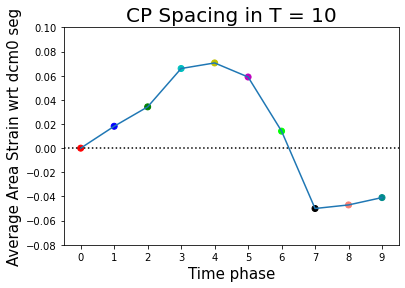

In [30]:
import matplotlib.pyplot as plt

my_colors = my_colors[0:10]

plt.plot(ar_means_10)
plt.scatter(np.arange(10), ar_means_10, c=my_colors)

plt.xlabel('Time phase', fontsize=15)
plt.ylabel('Average Area Strain wrt dcm0 seg', fontsize=15)
plt.xticks(np.arange(10))

plt.xlim(-0.5, 9.5)
plt.ylim(-0.08, 0.1)

plt.title("CP Spacing in T = 10", fontsize=20)

plt.hlines(0.0, -0.5, 10.5, linestyles='dotted', color='black')

### Plotting 10 and 20 frame curves on same graph

Strains wrt dcm0/Manual seg

__Conclusion__: Plotting 10 or 20 frame has an effect on the area strain

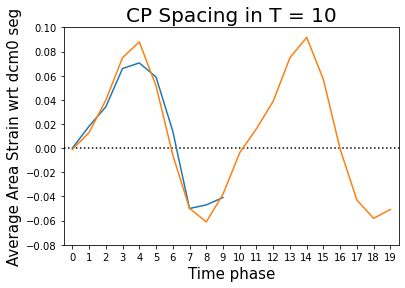

In [33]:
plt.plot(ar_means_10)
plt.plot(ar_means)

plt.title("CP Spacing in T = 10", fontsize=20)
plt.xlabel('Time phase', fontsize=15)
plt.ylabel('Average Area Strain wrt dcm0 seg', fontsize=15)
plt.xticks(np.arange(20))

plt.xlim(-0.5, 19.5)
plt.ylim(-0.08, 0.1)

plt.hlines(0.0, -0.5, 20.5, linestyles='dotted', color='black')

__Registering repeated cycles affects area strain values.__ *When using same CP in T*

## Plotting T = 20 Curves

Spotted issue with original 20 frame repeated tracking: control point spacing in T was = 10. 

__See difference Control Point Spacing in T makes on strain curves__

All strains plotted wrt dcm0 Mesh

In [34]:
cat /home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/test_cyclicity/Final_TSpacing.cfg

[ input ]
Padding value                      = -1024

[ transformation ]
Transformation model               = FFD
Control point spacing in T         = 20

[ optimization ]
Energy preconditioning             = 0.001
Divide data terms by initial value = No
Interpolation mode                 = Linear
Epsilon                            = -1e-7
Image (dis-)similarity measure     = NMI

[ Level 1 ]
Blurring [mm]                      = 1
Resolution [mm]                    = 2 2 2
Minimum length of steps            = 0.01
Maximum length of steps            = 4
[ Level 2 ]
Blurring [mm]                      = 3
Resolution [mm]                    = 5 5 5
Minimum length of steps            = 0.01
Maximum length of steps            = 4
[ Level 3 ]
Blurring [mm]                      = 6
Resolution [mm]                    = 10 10 10
Minimum length of steps            = 0.01
Maximum length of steps            = 4
[ Level 4 ]
Blurring [mm]                      = 12
Resolution [mm]                    =

In [35]:
# Array of DataFrames.
# Contains area strain of ALL cells across 20 time phases
# Dim is No time phases, No of cells
ar_df_t20 = np.zeros((20, 149195))

In [36]:
# Read in area strains wrt dcm0/Manual mesh for all 20 time phases
for i in range(0, 20):
    
    print(f'i = {i}')
    
    df = pd.read_csv(f'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/test_cyclicity/area-strains-{i}.csv')
    df = clean_areastrains_df(df)
    
    ar_df_t20[(i),:] = np.squeeze(df.to_numpy())

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19


In [37]:
# array of mean area change across ALL cells, for every time phase
ar_means_t20 = ar_df_t20.mean(axis=1)
ar_means_t20

array([ 0.00075281,  0.02001047,  0.04763151,  0.07022041,  0.0729994 ,
        0.04743742,  0.00890683, -0.02437199, -0.0397851 , -0.03033108,
       -0.00271396,  0.03251128,  0.06186595,  0.07188939,  0.06371049,
        0.0429071 ,  0.01421548, -0.01726971, -0.04495924, -0.06242264])

Text(0.5, 0, 'Time Phase')

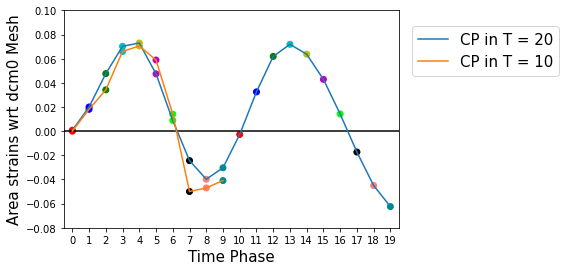

In [39]:
my_colors = ['r', 'b', 'g', 'c', 'y', 'm', 'lime', 'k', 'salmon', 'darkcyan']
my_colors = 2*my_colors

# Plot CP in T = 20 for 20 frames
plt.plot(ar_means_t20, label="CP in T = 20")
plt.scatter(np.arange(20), ar_means_t20, c=my_colors)

# Plot CP in T = 10 for 20 frames
# plt.plot(ar_means, label="CP in T = 10")
# plt.scatter(np.arange(20), ar_means, c=my_colors)

# Plot CP in T = 10 for 10 frames
plt.plot(ar_means_10, label="CP in T = 10")
plt.scatter(np.arange(10), ar_means_10, c=my_colors[:10])

plt.hlines(0.0, -0.5, 20.5, linestyles='solid', color='black')

plt.xticks(np.arange(20))
plt.xlim(-0.5, 19.5)
plt.ylim(-0.08, 0.1)
plt.legend(fontsize=15, loc=(1.04,0.7))

plt.xticks(np.arange(20))

plt.ylabel("Area strains wrt dcm0 Mesh", fontsize=15)
plt.xlabel("Time Phase", fontsize=15)

__When using correct CP in T, area strains are more consistent__.

In [40]:
# Errors in area strains of repeated phases with CP in T = 10

SqE = 0.0
AbsE = 0.0

AbsE_list = []

for i in range(0, 10):
    
    j = i+10

    print(f"Avg area strain of transformed-{str(i)}: \t", ar_means[i])
    print(f"Avg area strain of transformed-{str(j)}: \t", ar_means[j], "\n")
    
    SqE = SqE + (ar_means[i] - ar_means[j])**2
    AbsE = AbsE + np.abs(ar_means[i] - ar_means[j])
    AbsE_list.append(np.abs(ar_means[i] - ar_means[j]))
    
MSE = SqE/10.0
MAE = AbsE/10.0
print("MSE across repeated img frames: ", MSE)
print("MAE across repeated img frames: ", MAE)

Avg area strain of transformed-0: 	 -0.0011266218752347338
Avg area strain of transformed-10: 	 -0.0037562505455137314 

Avg area strain of transformed-1: 	 0.01292353729394161
Avg area strain of transformed-11: 	 0.016120998448435172 

Avg area strain of transformed-2: 	 0.03970868898433687
Avg area strain of transformed-12: 	 0.038853191265562775 

Avg area strain of transformed-3: 	 0.07492763406024393
Avg area strain of transformed-13: 	 0.07487808697299479 

Avg area strain of transformed-4: 	 0.08799693778552038
Avg area strain of transformed-14: 	 0.09171309168776184 

Avg area strain of transformed-5: 	 0.05156633134093877
Avg area strain of transformed-15: 	 0.05674056431104709 

Avg area strain of transformed-6: 	 -0.005647721262355172
Avg area strain of transformed-16: 	 -0.0008379542983024491 

Avg area strain of transformed-7: 	 -0.049742524655301934
Avg area strain of transformed-17: 	 -0.04296407784084518 

Avg area strain of transformed-8: 	 -0.06110458784967535
Avg are

In [41]:
# Errors in strains of repeated phases with CP in T = 20

SqE = 0.0
AbsE = 0.0

AbsE_list_t20 = []

for i in range(0, 10):
    
    j = i+10

    print(f"Avg area strain of transformed-{str(i)}: \t", ar_means_t20[i])
    print(f"Avg area strain of transformed-{str(j)}: \t", ar_means_t20[j], "\n")
    
    SqE = SqE + (ar_means_t20[i] - ar_means_t20[j])**2
    AbsE = AbsE + np.abs(ar_means_t20[i] - ar_means_t20[j])
    AbsE_list_t20.append(np.abs(ar_means_t20[i] - ar_means_t20[j]))
    
MSE = SqE/10.0
MAE = AbsE/10.0

print("MSE across repeated img frames: ", MSE)
print("MAE across repeated img frames: ", MAE)

Avg area strain of transformed-0: 	 0.0007528082905491304
Avg area strain of transformed-10: 	 -0.0027139599082007543 

Avg area strain of transformed-1: 	 0.0200104737801823
Avg area strain of transformed-11: 	 0.032511276131173765 

Avg area strain of transformed-2: 	 0.04763151326509522
Avg area strain of transformed-12: 	 0.06186594772707965 

Avg area strain of transformed-3: 	 0.0702204064193783
Avg area strain of transformed-13: 	 0.07188938611877606 

Avg area strain of transformed-4: 	 0.07299940084973072
Avg area strain of transformed-14: 	 0.06371049414042362 

Avg area strain of transformed-5: 	 0.04743741910864474
Avg area strain of transformed-15: 	 0.04290710277866218 

Avg area strain of transformed-6: 	 0.008906834849988889
Avg area strain of transformed-16: 	 0.01421547810638814 

Avg area strain of transformed-7: 	 -0.024371992025630815
Avg area strain of transformed-17: 	 -0.017269713519900098 

Avg area strain of transformed-8: 	 -0.039785101671643654
Avg area stra

Text(0.5, 0, 'Repeated img (dcm-*)')

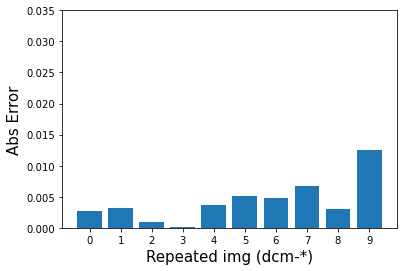

In [42]:
plt.bar(np.arange(10), AbsE_list)
plt.ylim(0.0, 0.035)
plt.ylabel("Abs Error", fontsize=15)
plt.xticks(np.arange(10))
plt.xlabel("Repeated img (dcm-*)", fontsize=15)

Text(0.5, 0, 'Repeated img (dcm-*)')

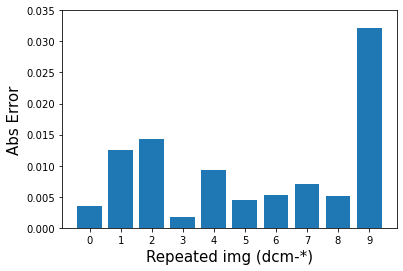

In [43]:
plt.bar(np.arange(10), AbsE_list_t20)
plt.ylim(0.0, 0.035)
plt.ylabel("Abs Error", fontsize=15)
plt.xticks(np.arange(10))
plt.xlabel("Repeated img (dcm-*)", fontsize=15)

## Effect of CP in T

* Correct CP in T gives __smoother curve in T__ and __agrees better with 1 cycle tracking in peak strain value__.
* Slightly worse replication of area strains at repeated imgs: __MAE, MSE__. See specific image pairing contributions to errors above

## Temporal Smoothing

* Printed out default params for TSFFD (below)
* No temporal smoothing param. Transformation model of BSplineFFD == FFD, so expect BSplines in time to be inherent.

In [44]:
cat /home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT-01/MT-HiRes/test_cyclicity/default_register.cfg

## Version 1.1.0 (rev 5c899c9, built on Apr 16 2020)

#
# Registration parameters
#

Maximum no. of line search iterations    = 20
Reuse previous step length               = Yes
Strict step length range                 = Yes
Maximum streak of rejected steps         = 5
Transformation model                     = Rigid+Affine+BSplineFFD
Multi-level transformation               = Default
Merge global and local transformation    = No
Optimization method                      = ConjugateGradientDescent
No. of resolution levels                 = 4
Interpolation mode                       = Fast linear
Extrapolation mode                       = Default
Precompute image derivatives             = No
Normalize weights of energy terms        = Yes
Downsample images with padding           = Yes
Crop/pad images                          = Yes
Crop/pad FFD lattice                     = Yes
Adaptive surface remeshing               = No
Padding value                            = -1025
Resolution [mm]   

## Ideas to try:

* Investigate area strains over > 2 cardiac cycles - Does discrepancy in area strains worsen over more cycles (Drift effect)?
* Plot area strains over 21 frames - see if additional dcm0 affects last area strain data point. __Essentially tests the cyclic condition in TSFFD paper__